In [1]:
import requests
from pandas import set_option, json_normalize, DataFrame, merge
from numpy import select

In [22]:
set_option("display.max_columns", 100)
#set_option("display.max_rows", 15)


In [2]:
lista = requests.get('https://www.alura.com.br/api/cursos', auth=('user', 'pass'))
# lista.encoding
lista = lista.json()

In [3]:
df_lista = DataFrame(lista)
df_lista.head(5)

,tempo_estimado,slug,nome
0,8,dot-net-6-identity-controle-usuario,.NET 6 e Identity: implementando controle de u...
1,10,dotnet-criando-web-api,.NET 6: criando uma web API
2,8,dotnet-relacionando-entidades,.NET 6: relacionando entidades
3,6,empresa-agil,A Empresa Ágil: introduzindo o Business Agilit...
4,6,acessibilidade-web-front-end,Acessibilidade web parte 1: tornando seu front...


In [4]:
# lista_detalhes = []
# for i in range(0, len(lista)):
#     slug = lista[i]['slug']
#     slug_url = f'https://cursos.alura.com.br/api/curso-{slug}'
#     slug1 = requests.get(slug_url)

#     lista_detalhes.append(slug1.json())

cursos_detalhados_json = []
for curso in lista:
    slug = curso['slug']
    curso_detalhado_url = f'https://cursos.alura.com.br/api/curso-{slug}'
    curso_detalhado_response = requests.get(curso_detalhado_url)

    cursos_detalhados_json.append(curso_detalhado_response.json())

In [39]:
cursos_detalhados_df = DataFrame(cursos_detalhados_json)
cursos_detalhados_df.head(15)

,showable,id,slug,nome,metadescription,meta_title,categoria,subcategoria,quantidade_aulas,minutos_video,nota,nota_disponivel,quantidade_avaliacoes,quantidade_alunos,carga_horaria,quantidade_atividades,data_criacao,data_atualizacao,video_1a_aula,publico_alvo,chamadas,ementa,instrutores,carreiras,musicas,depoimentos,formacoes,curso_substituto,alunos_ativos,parceiros,requerimentos,highlightedExtraField,transcriptions
0,True,2974,dot-net-6-identity-controle-usuario,.NET 6 e Identity: implementando controle de u...,"Entenda como o Identity, integrado ao Entity, ...",,"{'nome': 'Programação', 'slug': 'programacao',...","{'slug': 'dotnet', 'nome': '.NET', 'metaTitle'...",5,131,9.3,True,307,655,8,45,2023-04-18,2023-05-15,https://video.alura.com.br/alura/811381867-sd....,"Qualquer pessoa com conhecimento em C#, banco ...",[Entenda conceitos de organização e separação ...,"[{'capitulo': 'Conhecendo o Identity', 'secoes...",[{'twitter': 'https://twitter.com/DanielArtine...,[],[],[],"[{'codigo': 'dotnet', 'cor': '#00c86f', 'titul...",None,{'alunos': [{'username': 'daniel-dmlinformatic...,[],[.NET 6: relacionando entidades],,"[{'sectionName': 'Conhecendo o Identity', 'tas..."
1,True,2792,dotnet-criando-web-api,.NET 6: criando uma web API,Qualquer pessoa com conhecimento em C# que que...,,"{'nome': 'Programação', 'slug': 'programacao',...","{'slug': 'dotnet', 'nome': '.NET', 'metaTitle'...",6,170,9.4,True,1487,3372,10,55,2022-12-01,2023-05-04,https://video.alura.com.br/alura/769007907-sd....,Profissionais que já atuam no desenvolvimento ...,"[Aprenda a receber requisições em sua API\r, E...","[{'capitulo': 'Entendendo o conceito', 'secoes...",[{'twitter': 'https://twitter.com/DanielArtine...,[],[],[],"[{'codigo': 'dotnet', 'cor': '#00c86f', 'titul...",None,"{'alunos': [{'username': 'itamarbb1', 'nome': ...",[],[HTTP: entendendo a web por baixo dos panos],,"[{'sectionName': 'Entendendo o conceito', 'tas..."
2,True,2876,dotnet-relacionando-entidades,.NET 6: relacionando entidades,Faça este curso e entenda como o Entity Framew...,,"{'nome': 'Programação', 'slug': 'programacao',...","{'slug': 'dotnet', 'nome': '.NET', 'metaTitle'...",5,125,9.2,True,579,1144,8,44,2023-02-03,2023-04-28,https://video.alura.com.br/alura/788410424-sd....,Qualquer pessoa com conhecimento em C# e na cr...,[Entenda como o Entity pode te ajudar a relaci...,"[{'capitulo': 'Crescendo o projeto', 'secoes':...",[{'twitter': 'https://twitter.com/DanielArtine...,[],[],[],"[{'codigo': 'dotnet', 'cor': '#00c86f', 'titul...",None,"{'alunos': [{'username': 'hufesouza', 'nome': ...",[],[.NET 6: criando uma web API],,"[{'sectionName': 'Crescendo o projeto', 'taskN..."
3,True,1091,empresa-agil,A Empresa Ágil: introduzindo o Business Agilit...,Nesse curso você vai aprender os primeiros pas...,,"{'nome': 'Inovação & Gestão', 'slug': 'inovaca...","{'slug': 'transformacao-agil', 'nome': 'Transf...",6,80,9.3,True,36966,42761,6,31,2019-05-02,2023-02-09,https://video.alura.com.br/alura/754482117-sd....,Estudantes que buscam qualificação profissiona...,[Aprenda como uma empresa aprende a ser Ágil\r...,"[{'capitulo': 'Business Agility', 'secoes': ['...","[{'twitter': 'axmagno', 'linkedin': 'https://w...",[],[],"[{'texto': 'Um curso rápido, enxuto. O profess...","[{'codigo': 'business-agility', 'cor': '#ff8c2...",None,"{'alunos': [{'username': 'desenvolvimento35', ...",[{'imageUrl': 'https://cdn1.gnarususercontent....,[],,"[{'sectionName': 'Business Agility', 'taskName..."
4,True,805,acessibilidade-web-front-end,Acessibilidade web parte 1: tornando seu front...,Curso prático para você deixar o front-end do ...,,"{'nome': 'Front-end', 'slug': 'front-end', 'or...","{'slug': 'html-css', 'nome': 'HTML e CSS', 'me...",5,154,9.2,True,11799,22313,6,50,2018-04-19,2023-05-18,https://video.alura.com.br/alura/261911673-sd....,Pessoas com conhecimentos básicos em HTML e CS...,[Melhore seu site para usuários de leitor de t...,"[{'capitulo': 'HTML e os leitores de tela', 's...",[{'twitter': 'https://twitte

In [40]:
# cursos_detalhados_df['test_slug'] = df_lista['slug']
# cursos_detalhados_df

In [41]:
cursos_detalhados_df = cursos_detalhados_df.drop(['ementa','chamadas','publico_alvo','video_1a_aula','instrutores','musicas','depoimentos',
                            'transcriptions','highlightedExtraField','curso_substituto','meta_title','video_1a_aula','parceiros','formacoes'], axis=1)

cursos_detalhados_df.head(3)

,showable,id,slug,nome,metadescription,categoria,subcategoria,quantidade_aulas,minutos_video,nota,nota_disponivel,quantidade_avaliacoes,quantidade_alunos,carga_horaria,quantidade_atividades,data_criacao,data_atualizacao,carreiras,alunos_ativos,requerimentos
0,True,2974,dot-net-6-identity-controle-usuario,.NET 6 e Identity: implementando controle de u...,"Entenda como o Identity, integrado ao Entity, ...","{'nome': 'Programação', 'slug': 'programacao',...","{'slug': 'dotnet', 'nome': '.NET', 'metaTitle'...",5,131,9.3,True,307,655,8,45,2023-04-18,2023-05-15,[],{'alunos': [{'username': 'daniel-dmlinformatic...,[.NET 6: relacionando entidades]
1,True,2792,dotnet-criando-web-api,.NET 6: criando uma web API,Qualquer pessoa com conhecimento em C# que que...,"{'nome': 'Programação', 'slug': 'programacao',...","{'slug': 'dotnet', 'nome': '.NET', 'metaTitle'...",6,170,9.4,True,1487,3372,10,55,2022-12-01,2023-05-04,[],"{'alunos': [{'username': 'itamarbb1', 'nome': ...",[HTTP: entendendo a web por baixo dos panos]
2,True,2876,dotnet-relacionando-entidades,.NET 6: relacionando entidades,Faça este curso e entenda como o Entity Framew...,"{'nome': 'Programação', 'slug': 'programacao',...","{'slug': 'dotnet', 'nome': '.NET', 'metaTitle'...",5,125,9.2,True,579,1144,8,44,2023-02-03,2023-04-28,[],"{'alunos': [{'username': 'hufesouza', 'nome': ...",[.NET 6: criando uma web API]


In [42]:
cursos_detalhados_df['alunos_ativos_total'] = json_normalize(cursos_detalhados_df['alunos_ativos'])['total']
cursos_detalhados_df.head(5)

,showable,id,slug,nome,metadescription,categoria,subcategoria,quantidade_aulas,minutos_video,nota,nota_disponivel,quantidade_avaliacoes,quantidade_alunos,carga_horaria,quantidade_atividades,data_criacao,data_atualizacao,carreiras,alunos_ativos,requerimentos,alunos_ativos_total
0,True,2974,dot-net-6-identity-controle-usuario,.NET 6 e Identity: implementando controle de u...,"Entenda como o Identity, integrado ao Entity, ...","{'nome': 'Programação', 'slug': 'programacao',...","{'slug': 'dotnet', 'nome': '.NET', 'metaTitle'...",5,131,9.3,True,307,655,8,45,2023-04-18,2023-05-15,[],{'alunos': [{'username': 'daniel-dmlinformatic...,[.NET 6: relacionando entidades],427.0
1,True,2792,dotnet-criando-web-api,.NET 6: criando uma web API,Qualquer pessoa com conhecimento em C# que que...,"{'nome': 'Programação', 'slug': 'programacao',...","{'slug': 'dotnet', 'nome': '.NET', 'metaTitle'...",6,170,9.4,True,1487,3372,10,55,2022-12-01,2023-05-04,[],"{'alunos': [{'username': 'itamarbb1', 'nome': ...",[HTTP: entendendo a web por baixo dos panos],1073.0
2,True,2876,dotnet-relacionando-entidades,.NET 6: relacionando entidades,Faça este curso e entenda como o Entity Framew...,"{'nome': 'Programação', 'slug': 'programacao',...","{'slug': 'dotnet', 'nome': '.NET', 'metaTitle'...",5,125,9.2,True,579,1144,8,44,2023-02-03,2023-04-28,[],"{'alunos': [{'username': 'hufesouza', 'nome': ...",[.NET 6: criando uma web API],398.0
3,True,1091,empresa-agil,A Empresa Ágil: introduzindo o Business Agilit...,Nesse curso você vai aprender os primeiros pas...,"{'nome': 'Inovação & Gestão', 'slug': 'inovaca...","{'slug': 'transformacao-agil', 'nome': 'Transf...",6,80,9.3,True,36966,42761,6,31,2019-05-02,2023-02-09,[],"{'alunos': [{'username': 'desenvolvimento35', ...",[],2102.0
4,True,805,acessibilidade-web-front-end,Acessibilidade web parte 1: tornando seu front...,Curso prático para você deixar o front-end do ...,"{'nome': 'Front-end', 'slug': 'front-end', 'or...","{'slug': 'html-css', 'nome': 'HTML e CSS', 'me...",5,154,9.2,True,11799,22313,6,50,2018-04-19,2023-05-18,[],"{'alunos': [{'username': 'matheusw3314', 'nome...","[HTML e CSS: ambientes de desenvolvimento, est...",1197.0


In [43]:
cursos_detalhados_df['nome_categoria'] = json_normalize(cursos_detalhados_df['categoria'])['nome']
cursos_detalhados_df['nome_subcategoria'] = json_normalize(cursos_detalhados_df['subcategoria'])['nome']
cursos_detalhados_df.head(5)

,showable,id,slug,nome,metadescription,categoria,subcategoria,quantidade_aulas,minutos_video,nota,nota_disponivel,quantidade_avaliacoes,quantidade_alunos,carga_horaria,quantidade_atividades,data_criacao,data_atualizacao,carreiras,alunos_ativos,requerimentos,alunos_ativos_total,nome_categoria,nome_subcategoria
0,True,2974,dot-net-6-identity-controle-usuario,.NET 6 e Identity: implementando controle de u...,"Entenda como o Identity, integrado ao Entity, ...","{'nome': 'Programação', 'slug': 'programacao',...","{'slug': 'dotnet', 'nome': '.NET', 'metaTitle'...",5,131,9.3,True,307,655,8,45,2023-04-18,2023-05-15,[],{'alunos': [{'username': 'daniel-dmlinformatic...,[.NET 6: relacionando entidades],427.0,Programação,.NET
1,True,2792,dotnet-criando-web-api,.NET 6: criando uma web API,Qualquer pessoa com conhecimento em C# que que...,"{'nome': 'Programação', 'slug': 'programacao',...","{'slug': 'dotnet', 'nome': '.NET', 'metaTitle'...",6,170,9.4,True,1487,3372,10,55,2022-12-01,2023-05-04,[],"{'alunos': [{'username': 'itamarbb1', 'nome': ...",[HTTP: entendendo a web por baixo dos panos],1073.0,Programação,.NET
2,True,2876,dotnet-relacionando-entidades,.NET 6: relacionando entidades,Faça este curso e entenda como o Entity Framew...,"{'nome': 'Programação', 'slug': 'programacao',...","{'slug': 'dotnet', 'nome': '.NET', 'metaTitle'...",5,125,9.2,True,579,1144,8,44,2023-02-03,2023-04-28,[],"{'alunos': [{'username': 'hufesouza', 'nome': ...",[.NET 6: criando uma web API],398.0,Programação,.NET
3,True,1091,empresa-agil,A Empresa Ágil: introduzindo o Business Agilit...,Nesse curso você vai aprender os primeiros pas...,"{'nome': 'Inovação & Gestão', 'slug': 'inovaca...","{'slug': 'transformacao-agil', 'nome': 'Transf...",6,80,9.3,True,36966,42761,6,31,2019-05-02,2023-02-09,[],"{'alunos': [{'username': 'desenvolvimento35', ...",[],2102.0,Inovação & Gestão,Transformação Ágil
4,True,805,acessibilidade-web-front-end,Acessibilidade web parte 1: tornando seu front...,Curso prático para você deixar o front-end do ...,"{'nome': 'Front-end', 'slug': 'front-end', 'or...","{'slug': 'html-css', 'nome': 'HTML e CSS', 'me...",5,154,9.2,True,11799,22313,6,50,2018-04-19,2023-05-18,[],"{'alunos': [{'username': 'matheusw3314', 'nome...","[HTML e CSS: ambientes de desenvolvimento, est...",1197.0,Front-end,HTML e CSS


In [44]:
m = cursos_detalhados_df['alunos_ativos_total'].mean()
flag = [
    cursos_detalhados_df['alunos_ativos_total'] <= m,
    (cursos_detalhados_df['alunos_ativos_total'] <= m + 400) & (cursos_detalhados_df['alunos_ativos_total']>m),
    ]
lista = ['Moderadamente Popular', 'Popular']
cursos_detalhados_df['Popularidade'] = select(flag, lista, default='Muito Popular')
cursos_detalhados_df.head(5)

,showable,id,slug,nome,metadescription,categoria,subcategoria,quantidade_aulas,minutos_video,nota,nota_disponivel,quantidade_avaliacoes,quantidade_alunos,carga_horaria,quantidade_atividades,data_criacao,data_atualizacao,carreiras,alunos_ativos,requerimentos,alunos_ativos_total,nome_categoria,nome_subcategoria,Popularidade
0,True,2974,dot-net-6-identity-controle-usuario,.NET 6 e Identity: implementando controle de u...,"Entenda como o Identity, integrado ao Entity, ...","{'nome': 'Programação', 'slug': 'programacao',...","{'slug': 'dotnet', 'nome': '.NET', 'metaTitle'...",5,131,9.3,True,307,655,8,45,2023-04-18,2023-05-15,[],{'alunos': [{'username': 'daniel-dmlinformatic...,[.NET 6: relacionando entidades],427.0,Programação,.NET,Moderadamente Popular
1,True,2792,dotnet-criando-web-api,.NET 6: criando uma web API,Qualquer pessoa com conhecimento em C# que que...,"{'nome': 'Programação', 'slug': 'programacao',...","{'slug': 'dotnet', 'nome': '.NET', 'metaTitle'...",6,170,9.4,True,1487,3372,10,55,2022-12-01,2023-05-04,[],"{'alunos': [{'username': 'itamarbb1', 'nome': ...",[HTTP: entendendo a web por baixo dos panos],1073.0,Programação,.NET,Muito Popular
2,True,2876,dotnet-relacionando-entidades,.NET 6: relacionando entidades,Faça este curso e entenda como o Entity Framew...,"{'nome': 'Programação', 'slug': 'programacao',...","{'slug': 'dotnet', 'nome': '.NET', 'metaTitle'...",5,125,9.2,True,579,1144,8,44,2023-02-03,2023-04-28,[],"{'alunos': [{'username': 'hufesouza', 'nome': ...",[.NET 6: criando uma web API],398.0,Programação,.NET,Moderadamente Popular
3,True,1091,empresa-agil,A Empresa Ágil: introduzindo o Business Agilit...,Nesse curso você vai aprender os primeiros pas...,"{'nome': 'Inovação & Gestão', 'slug': 'inovaca...","{'slug': 'transformacao-agil', 'nome': 'Transf...",6,80,9.3,True,36966,42761,6,31,2019-05-02,2023-02-09,[],"{'alunos': [{'username': 'desenvolvimento35', ...",[],2102.0,Inovação & Gestão,Transformação Ágil,Muito Popular
4,True,805,acessibilidade-web-front-end,Acessibilidade web parte 1: tornando seu front...,Curso prático para você deixar o front-end do ...,"{'nome': 'Front-end', 'slug': 'front-end', 'or...","{'slug': 'html-css', 'nome': 'HTML e CSS', 'me...",5,154,9.2,True,11799,22313,6,50,2018-04-19,2023-05-18,[],"{'alunos': [{'username': 'matheusw3314', 'nome...","[HTML e CSS: ambientes de desenvolvimento, est...",1197.0,Front-end,HTML e CSS,Muito Popular


In [45]:
cursos_detalhados_df[['nota']].head(30).style \
                            .format('R$ {:,.1f}').background_gradient(cmap='Greens')


,nota
0,R$ 9.3
1,R$ 9.4
2,R$ 9.2
3,R$ 9.3
4,R$ 9.2
5,R$ 9.1
6,R$ 9.2
7,R$ 9.0
8,R$ 9.3
9,R$ 9.3


In [46]:
estatisticas_nota_por_categoria = cursos_detalhados_df[['nome_categoria','nota']].groupby(by=['nome_categoria']).agg(func=[ 'mean','min', 'max', 'std'])
estatisticas_nota_por_categoria

nota                    
                       mean  min  max       std
nome_categoria                                 
Data Science       9.211521  8.4  9.6  0.195093
DevOps             9.213636  8.7  9.5  0.143975
Front-end          9.222936  8.4  9.7  0.217576
Inovação & Gestão  9.223203  8.7  9.5  0.130387
Mobile             9.193069  8.7  9.6  0.155729
Programação        9.261818  8.5  9.6  0.187269
UX & Design        9.261151  8.3  9.7  0.175178

In [47]:
estatisticas_nota_por_categoria.sort_values([('nota', 'mean'), ('nota', 'max')])

nota                    
                       mean  min  max       std
nome_categoria                                 
Mobile             9.193069  8.7  9.6  0.155729
Data Science       9.211521  8.4  9.6  0.195093
DevOps             9.213636  8.7  9.5  0.143975
Front-end          9.222936  8.4  9.7  0.217576
Inovação & Gestão  9.223203  8.7  9.5  0.130387
UX & Design        9.261151  8.3  9.7  0.175178
Programação        9.261818  8.5  9.6  0.187269

In [48]:
cursos_categoria = cursos_detalhados_df.groupby(['nome_categoria'])['id'].agg(['count'])
cursos_categoria['percent'] = cursos_categoria.apply(lambda x: x/x.sum())
cursos_categoria.style.format({'percent': '{:.2%}'}).background_gradient(cmap='Blues')


,count,percent
nome_categoria,,
Data Science,217,15.30%
DevOps,132,9.31%
Front-end,109,7.69%
Inovação & Gestão,306,21.58%
Mobile,101,7.12%
Programação,275,19.39%
UX & Design,278,19.61%


In [49]:
cursos_categoria = cursos_detalhados_df.groupby(['nome_categoria'])['id'].agg(['count'])
cursos_categoria['percent'] = cursos_categoria.apply(lambda x: x/x.sum())
cursos_categoria.style.format({'percent': '{:.2%}'}).bar(subset='percent', vmin=0.05, color='lightblue')

,count,percent
nome_categoria,,
Data Science,217,15.30%
DevOps,132,9.31%
Front-end,109,7.69%
Inovação & Gestão,306,21.58%
Mobile,101,7.12%
Programação,275,19.39%
UX & Design,278,19.61%


In [50]:
cursos_subcategoria = cursos_detalhados_df.groupby(['nome_subcategoria'])['id'].agg(['count'])
cursos_subcategoria['percent'] = cursos_subcategoria.apply(lambda x: x/x.sum())
cursos_subcategoria.style.format({'percent': '{:.2%}'}).background_gradient(cmap='Purples')

,count,percent
nome_subcategoria,,
.NET,24,1.69%
3D,6,0.42%
AWS,23,1.62%
Android,43,3.03%
Angular,13,0.92%
Animação,5,0.35%
Arquitetura,3,0.21%
Arte Vetorial,8,0.56%
Automação e Performance,4,0.28%


In [55]:
cursos_detalhados_df.count()

showable                 1418
id                       1418
slug                     1418
nome                     1418
metadescription          1392
categoria                1418
subcategoria             1418
quantidade_aulas         1418
minutos_video            1418
nota                     1418
nota_disponivel          1418
quantidade_avaliacoes    1418
quantidade_alunos        1418
carga_horaria            1418
quantidade_atividades    1418
data_criacao             1418
data_atualizacao         1418
carreiras                1418
alunos_ativos            1132
requerimentos            1418
alunos_ativos_total      1132
nome_categoria           1418
nome_subcategoria        1418
Popularidade             1418
dtype: int64

In [61]:
#cursos_filtrado = cursos_detalhados_df.dropna().count()
cursos_filtrado = cursos_detalhados_df.dropna(subset=['nota']).count()
cursos_filtrado

showable                 1418
id                       1418
slug                     1418
nome                     1418
metadescription          1392
categoria                1418
subcategoria             1418
quantidade_aulas         1418
minutos_video            1418
nota                     1418
nota_disponivel          1418
quantidade_avaliacoes    1418
quantidade_alunos        1418
carga_horaria            1418
quantidade_atividades    1418
data_criacao             1418
data_atualizacao         1418
carreiras                1418
alunos_ativos            1132
requerimentos            1418
alunos_ativos_total      1132
nome_categoria           1418
nome_subcategoria        1418
Popularidade             1418
dtype: int64

In [63]:
cursos_filtrado = cursos_detalhados_df[(cursos_detalhados_df['nota'].notnull()) & (cursos_detalhados_df['Popularidade'].isin(['Popular', 'Muito Popular']))]
cursos_filtrado.shape

(549, 24)

In [64]:
cursos_filtrado['quantidade_alunos'].quantile(0.6)

3858.8000000000006

In [66]:
0.6*cursos_filtrado['quantidade_alunos']

1        2023.2
3       25656.6
4       13387.8
6       12190.8
8        4164.6
         ...   
1396     3276.6
1405      550.8
1408     1266.6
1411      615.0
1414     7669.8
Name: quantidade_alunos, Length: 549, dtype: float64

In [65]:
# Filtrar cursos com quantidade de avaliações maior que 60% da quantidade de alunos
notas_filtrado = cursos_filtrado[cursos_filtrado['quantidade_avaliacoes'] > 0.6*cursos_filtrado['quantidade_alunos']]
notas_filtrado
notas_filtrado.sort_values(by=['quantidade_avaliacoes', 'quantidade_alunos'], ascending=[False, False])

,showable,id,slug,nome,metadescription,categoria,subcategoria,quantidade_aulas,minutos_video,nota,nota_disponivel,quantidade_avaliacoes,quantidade_alunos,carga_horaria,quantidade_atividades,data_criacao,data_atualizacao,carreiras,alunos_ativos,requerimentos,alunos_ativos_total,nome_categoria,nome_subcategoria,Popularidade
3,True,1091,empresa-agil,A Empresa Ágil: introduzindo o Business Agilit...,Nesse curso você vai aprender os primeiros pas...,"{'nome': 'Inovação & Gestão', 'slug': 'inovaca...","{'slug': 'transformacao-agil', 'nome': 'Transf...",6,80,9.3,True,36966,42761,6,31,2019-05-02,2023-02-09,[],"{'alunos': [{'username': 'desenvolvimento35', ...",[],2102.0,Inovação & Gestão,Transformação Ágil,Muito Popular
8,True,1224,mysql-dba-administracao,Administração do MySQL: segurança e otimização...,O DBA (Database Administrator) tem um papel fu...,"{'nome': 'Data Science', 'slug': 'data-science...","{'slug': 'sql', 'nome': 'SQL e Banco de Dados'...",5,316,9.3,True,4310,6941,16,76,2019-09-17,2023-03-21,[],"{'alunos': [{'username': 'luzoliveiralais', 'n...",[Procedures SQL: executando código no MySQL],860.0,Data Science,SQL e Banco de Dados,Popular
60,True,1096,agile-coach,Agile Coach: lidere a transformação nas empresas,Aprenda nesse curso o que faz e como trabalha ...,"{'nome': 'Inovação & Gestão', 'slug': 'inovaca...","{'slug': 'transformacao-agil', 'nome': 'Transf...",9,119,9.3,True,6372,8197,6,33,2019-05-02,2023-03-08,[],"{'alunos': [{'username': 'dominguesvict', 'nom...",[],578.0,Inovação & Gestão,Transformação Ágil,Popular
62,True,883,agile-na-pratica,Agile na prática: técnicas aplicadas para Gest...,A gestão ágil de projetos é bem diferente das ...,"{'nome': 'Inovação & Gestão', 'slug': 'inovaca...","{'slug': 'gestao-agil', 'nome': 'Gestão Ágil',...",6,123,9.1,True,27385,34625,8,55,2018-07-03,2022-11-21,[],"{'alunos': [{'username': 'jhonnyfelipe', 'nome...","[Scrum: agilidade em seu projeto, Scrum parte ...",1126.0,Inovação & Gestão,Gestão Ágil,Muito Popular
66,True,1068,fundamentos-agilidade,Agilidade: promovendo a transformação ágil,Entenda os fundamentos da Agilidade. Aprenda c...,"{'nome': 'Inovação & Gestão', 'slug': 'inovaca...","{'slug': 'transformacao-agil', 'nome': 'Transf...",8,83,9.3,True,87237,107429,6,27,2019-05-02,2023-02-10,[],"{'alunos': [{'username': 'MarckAlves', 'nome':...",[],7325.0,Inovação & Gestão,Transformação Ágil,Muito Popular
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1378,True,1344,vendas-perguntas-poderosas,Vendas de alta performance: perguntas poderosas,Para ser um vendedor consultivo é preciso apre...,"{'nome': 'Inovação & Gestão', 'slug': 'inovaca...","{'slug': 'vendas', 'nome': 'Vendas', 'metaTitl...",5,109,9.3,True,47249,50838,6,41,2019-11-14,2022-04-26,[],"{'alunos': [{'username': 'eduardogondim0-0', '...",[Vendas de alta performance: entendendo a nece...,4166.0,Inovação & Gestão,Vendas,Muito Popular
1379,True,1345,vendas-alta-performance-pitch-dicas-negociacao,Vendas de alta performance: Pitch e dicas de n...,Saiba como construir abordagens de vendas apli...,"{'nome': 'Inovação & Gestão', 'slug': 'inovaca...","{'slug': 'vendas', 'nome': 'Vendas', 'metaTitl...",5,181,9.3,True,25177,28052,10,44,2021-07-20,2022-12-07,[],"{'alunos': [{'username': 'thiago-ben', 'nome':...",[],780.0,Inovação & Gestão,Vendas,Popular
1380,True,1343,vendas-prospeccao-de-clientes,Vendas de alta performance: prospecção de clie...,Aprenda como tornar o seu processo de prospecç...,"{'nome': 'Inovação & Gestão', 'slug': 'inovaca...","{'slug': 'vendas', 'nome': 'Vendas', 'metaTitl...",6,139,9.2,True,18253,20699,6,32,2020-10-15,2022-05-23,[],"{'alunos': [{'username': 'jener32', 'nome': 'A...",[Vendas de alta performance: vendas na era dig...,897.0,Inovação & Gestão,Vendas,Popular
1384,True,1125,vendas-alta-performance,Vendas de alta performance: vendas na era digital,Ter alta performance em vendas na era digital ...,"{'nome': 'Inovação & Gestão', 'slug': 'inovaca.

In [68]:
notas_filtrado.value_counts(['nome_categoria', 'nome_subcategoria']).head(20)

nome_categoria     nome_subcategoria                
Front-end          JavaScript                           13
Inovação & Gestão  Liderança                            11
Data Science       Business Intelligence                 8
Inovação & Gestão  Transformação Ágil                    7
Mobile             Android                               7
Inovação & Gestão  Negociação e Comunicação              7
Front-end          HTML e CSS                            7
Programação        Java                                  7
Inovação & Gestão  Gestão Ágil                           6
                   Vendas                                6
                   Métodos Ágeis                         6
Data Science       SQL e Banco de Dados                  6
Programação        Clojure                               5
Inovação & Gestão  Produtividade e Qualidade de Vida     5
                   Gestão Estratégica                    4
                   Startups e Empreendedorismo           4
Pro

## *Analise Exploratória*

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt

In [100]:
cursos_detalhados_df.describe()

,id,quantidade_aulas,minutos_video,nota,quantidade_avaliacoes,quantidade_alunos,carga_horaria,quantidade_atividades,alunos_ativos_total
count,1418.000000,1418.000000,1418.000000,1418.000000,1418.000000,1418.000000,1418.000000,1418.000000,1132.000000
mean,1891.647391,5.183357,145.104372,9.233286,3331.087447,5446.930183,8.794781,46.270099,505.234982
std,770.318425,1.041255,55.132845,0.173325,8293.207636,12145.733853,2.502121,14.090732,984.211805
min,99.000000,1.000000,0.000000,8.300000,33.000000,60.000000,1.000000,10.000000,51.000000
25%,1252.250000,5.000000,109.000000,9.100000,340.000000,744.250000,8.000000,38.000000,102.000000
50%,2007.000000,5.000000,136.000000,9.300000,875.000000,1871.000000,8.000000,44.000000,207.000000
75%,2566.750000,5.000000,171.000000,9.300000,2412.500000,4808.500000,10.000000,53.000000,484.000000
max,3159.000000,13.000000,506.000000,9.700000,100121.000000,176690.000000,24.000000,238.000000,12388.000000


In [81]:
cursos_detalhados_df.value_counts(['Popularidade'])

Popularidade         
Moderadamente Popular    869
Muito Popular            426
Popular                  123
dtype: int64

<AxesSubplot: xlabel='nota', ylabel='Count'>

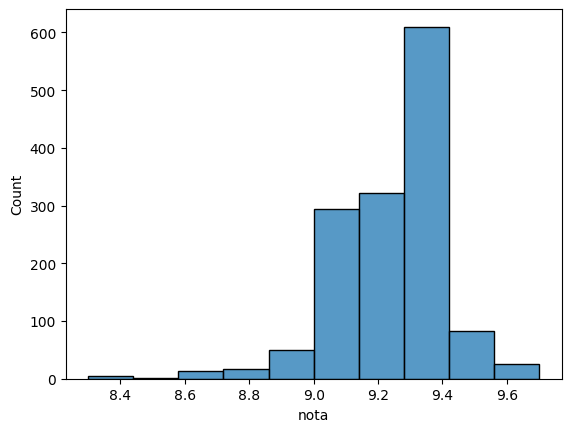

In [78]:
sns.histplot(data=cursos_detalhados_df, x='nota', bins=10)

<AxesSubplot: xlabel='nota', ylabel='Popularidade'>

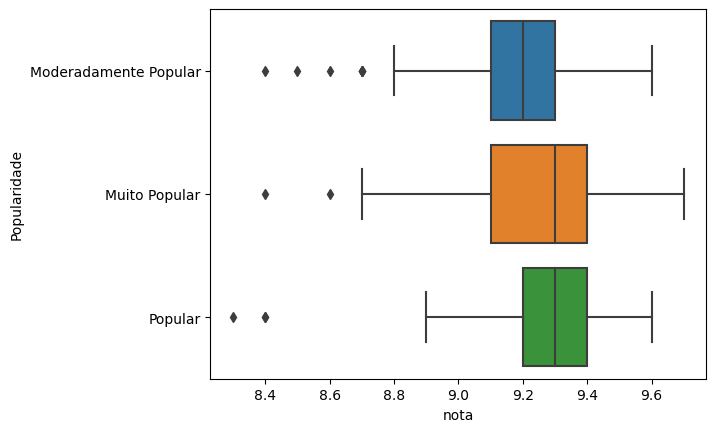

In [80]:
sns.boxplot(data=cursos_detalhados_df, x='nota', y='Popularidade')

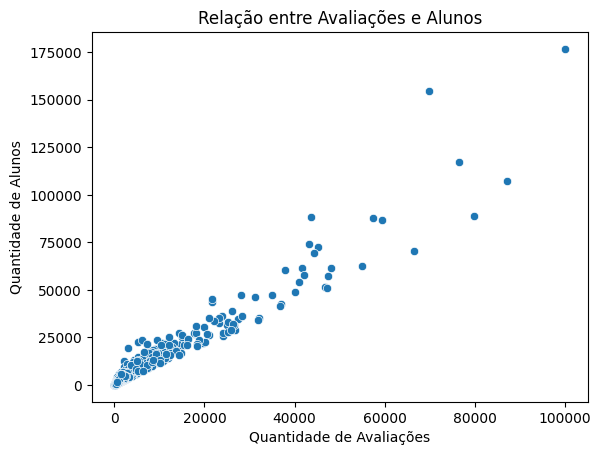

In [95]:
sns.scatterplot(data=cursos_detalhados_df, x='quantidade_avaliacoes', y='quantidade_alunos')
plt.title('Relação entre Avaliações e Alunos')
plt.xlabel('Quantidade de Avaliações')
plt.ylabel('Quantidade de Alunos')
plt.show()

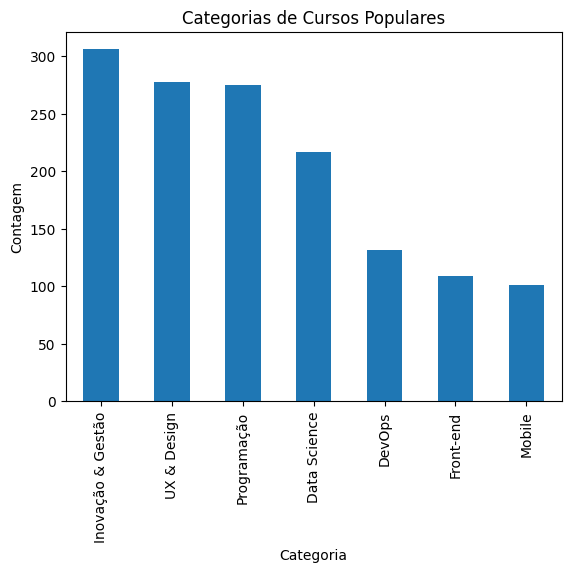

In [97]:
cursos_detalhados_df['nome_categoria'].value_counts().plot(kind='bar')
plt.title('Categorias de Cursos Populares')
plt.xlabel('Categoria')
plt.ylabel('Contagem')
plt.show()

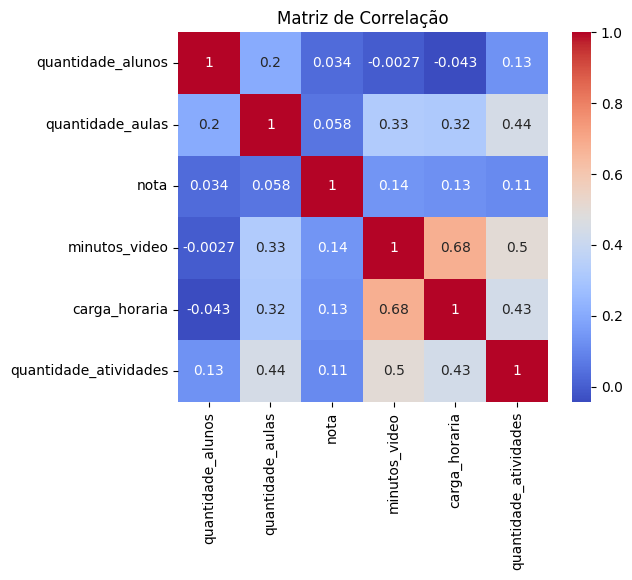

In [99]:
# Calcule a matriz de correlação
correlation_matrix = cursos_detalhados_df[['quantidade_alunos','quantidade_aulas','nota','minutos_video','carga_horaria','quantidade_atividades']].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Matriz de Correlação')
plt.show()

In [91]:
cursos_maior_nota = cursos_filtrado[cursos_filtrado['nota'] == cursos_filtrado['nota'].max()]
cursos_maior_nota


,showable,id,slug,nome,metadescription,categoria,subcategoria,quantidade_aulas,minutos_video,nota,nota_disponivel,quantidade_avaliacoes,quantidade_alunos,carga_horaria,quantidade_atividades,data_criacao,data_atualizacao,carreiras,alunos_ativos,requerimentos,alunos_ativos_total,nome_categoria,nome_subcategoria,Popularidade
628,True,2811,html-css-cabecalho-footer-variaveis-css,"HTML e CSS: cabeçalho, footer e variáveis CSS",Aprenda neste treinamento com a Rafaela Baller...,"{'nome': 'Front-end', 'slug': 'front-end', 'or...","{'slug': 'html-css', 'nome': 'HTML e CSS', 'me...",5,86,9.7,True,9178,12061,6,43,2023-01-26,2023-04-23,[],"{'alunos': [{'username': 'eric-arimura', 'nome...","[HTML e CSS: Classes, posicionamento e Flexbox]",4352.0,Front-end,HTML e CSS,Muito Popular
632,True,2884,html-css-responsividade-publicacao-projetos,HTML e CSS: trabalhando com responsividade e p...,Aprenda neste treinamento com a Rafaela Baller...,"{'nome': 'Front-end', 'slug': 'front-end', 'or...","{'slug': 'html-css', 'nome': 'HTML e CSS', 'me...",5,62,9.7,True,7779,9628,6,36,2023-01-31,2023-05-31,[],"{'alunos': [{'username': 'liverton-abreu', 'no...","[HTML e CSS: cabeçalho, footer e variáveis CSS]",3414.0,Front-end,HTML e CSS,Muito Popular
640,True,753,ilustracao-digital-cenario-isometrico-games,Ilustração digital: criando cenários isométric...,"Neste curso, você irá aprender a criar ilustra...","{'nome': 'UX & Design', 'slug': 'design-ux', '...","{'slug': 'design-ilustracao', 'nome': 'Ilustra...",5,203,9.7,True,46,218,10,46,2021-01-27,2022-09-21,[],None,[Ilustração digital: criando a partir da persp...,NaN,UX & Design,Ilustração Digital,Muito Popular
